In [15]:
import pymysql.cursors
import os
from dotenv  import load_dotenv
import Used_CAr
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
pip install matplotlib

  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp312-cp312-win_amd64.whl.metadata (165 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.6/7.8 MB 12.0 MB/s eta 0:00:01
   ----- ---------------------------------- 1.1/7.8 MB 11.8 MB/s eta 0:00:01
   --------- ------------------------------ 1.8/7.8 MB 12.7 MB/s eta 0:00:01
   ------------ --------------------------- 2.4/7.8 MB 12.9 MB/s eta 0:00:01
   ----------------- ---------------------- 3.4/7.8 MB 13.6 MB/s eta 0:00:01
   ------------------- -------------------- 3.9/7.8 MB 13.1 MB/s eta 0:00:01
   ----------------------- ---------------- 4.6/7.8 MB 13.5 MB/s eta 0:00:01
   -----------------------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
load_dotenv()

host = os.getenv('HOST')
user = os.getenv('USER')
password = os.getenv('PASSWORD')
database = os.getenv('DATABASE')

In [17]:
connection = pymysql.connect(user=user,
host = host,
password =password,
database =database)

In [18]:
cursor = connection.cursor()

In [19]:
query = '''select Type as car_name ,count(type) as TotalCars from extension
group by type;'''

In [10]:
cursor.execute(query)

9

In [11]:
rows = cursor.fetchall()

In [12]:
rows

(('SUV', 9972),
 ('Van', 286),
 ('Coupe', 4163),
 ('Sedan', 8124),
 ('Convertible', 1310),
 ('Pickup', 2959),
 ('Minivan', 547),
 ('Hatchback', 759),
 ('Wagon', 6))

In [13]:
df = pd.DataFrame(data=rows)

In [14]:
df

,0,1
0,SUV,9972
1,Van,286
2,Coupe,4163
3,Sedan,8124
4,Convertible,1310
5,Pickup,2959
6,Minivan,547
7,Hatchback,759
8,Wagon,6


In [8]:
Used_Car.select_query(query=query)

AttributeError: column_names

In [24]:
df

,0,1
0,SUV,9972
1,Van,286
2,Coupe,4163
3,Sedan,8124
4,Convertible,1310
5,Pickup,2959
6,Minivan,547
7,Hatchback,759
8,Wagon,6


ValueError: could not convert string to float: 'SUV'

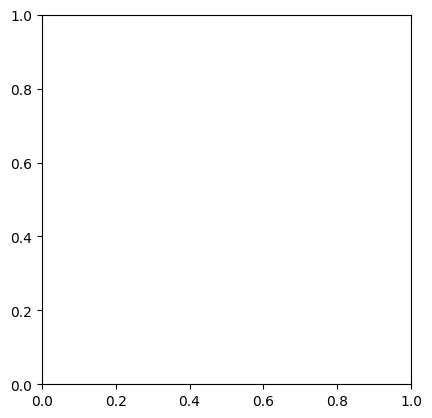

In [28]:
plt.pie(df,autopct='%1.2f%%',explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.3),radius = 1.2)
plt.title('0',fontsize = 20,fontname='impact')
plt.legend(loc="center left",
          bbox_to_anchor=(1.2, 0.3, 1, 1))
plt.show()